<a href="https://colab.research.google.com/github/igrosny/libros/blob/master/IMLP/Capitulo_2_Aprendizaje_automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capitulo 2: Aprendizaje supervisado
## Clasificacion y regresion

**Clasificacion** tiene como objetivo preddecir una clase. La clasificacion puede ser binaria o multiclass

**Regresion** tiene como objetivo predecir un numero continuo

### Generalizacion, Overfitting y Underfitting

In [8]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 20.7MB/s 
  Running setup.py bdist_wheel for mglearn ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
print(cancer.data.shape)

(569, 30)


In [4]:
import numpy as np

print(cancer.target_names)
np.bincount(cancer.target)


['malignant' 'benign']


array([212, 357])

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## K-Nearest Neighbor

### K-Neighbors Clasificacion

In [20]:
import mglearn
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto',leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                    weights='uniform')

clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [14]:
clf.score(X_test, y_test)

0.8571428571428571

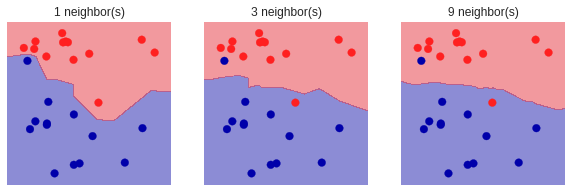

In [22]:
# Analizando KNeighborsClassifier
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  ax.scatter(X[:,0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
  ax.set_title("%d neighbor(s)" % n_neighbors)

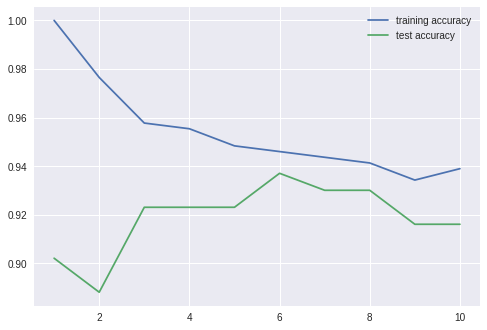

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# Prueba n vecinos de 1 a 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  #build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # guarda la precision del entrenamiento
  training_accuracy.append(clf.score(X_train, y_train))
  #guarda la precision de la generalizacion
  test_accuracy.append(clf.score(X_test, y_test))
  
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()
  

In [25]:
# Regresion K-Neighbors

from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# dividimos el set en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Inicializamos el model con n=3
reg = KNeighborsRegressor(n_neighbors=3)

# Entrenar el modelo
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                   metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                   weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [26]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])